In [22]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from pandas import concat
from matplotlib import pyplot
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

In [4]:
series = read_csv('datasets/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

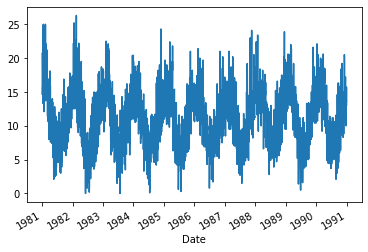

In [5]:
# Line plot
series.plot()
pyplot.show()

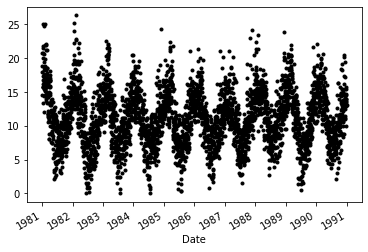

In [6]:
# Dot line plot
series.plot(style='k.')
pyplot.show()

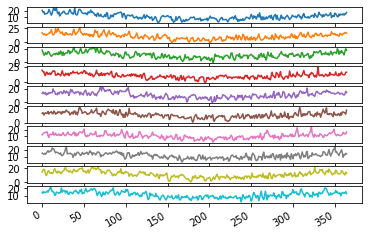

In [7]:
# Stacked line plots
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

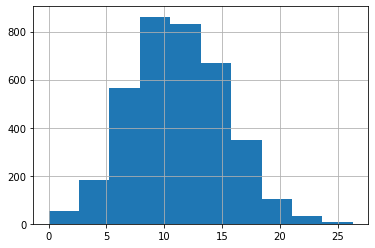

In [8]:
# Histogram Plot
series.hist()
pyplot.show()

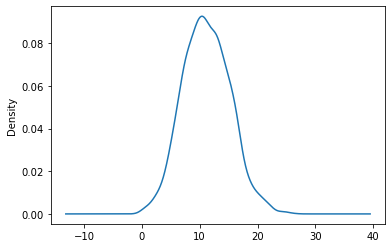

In [9]:
# Density Plot
series.plot(kind='kde')
pyplot.show()

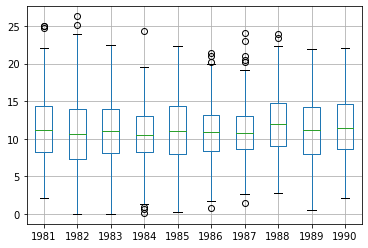

In [10]:
# Box and whisker Plot of Yearly data
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()

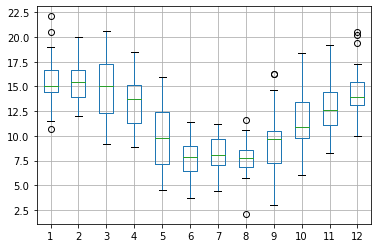

In [15]:
# Box and whisker plot of Monthly data
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1, 13)
months.boxplot()
pyplot.show()

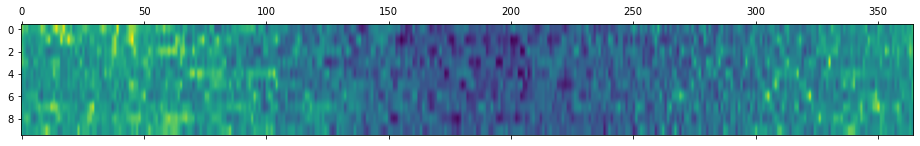

In [16]:
# Heat map of yearly data
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

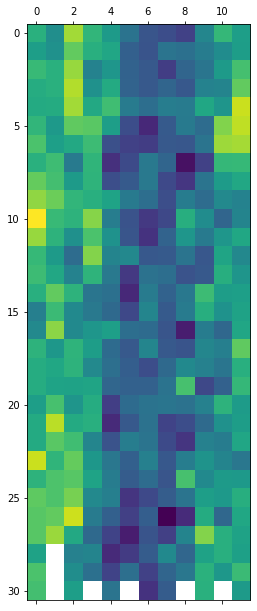

In [17]:
# Heat map on monthly data
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1, 13)
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

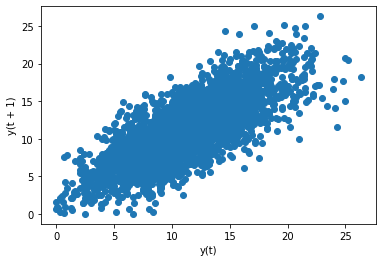

In [19]:
# Lag scatter plot
lag_plot(series)
pyplot.show()

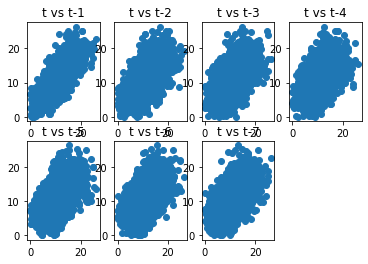

In [20]:
# Multiple scatter plots
values = DataFrame(series.values)
lags = 7
columns = [values]

for i in range(1, (lags + 1)):
    columns.append(values.shift(i))
    
dataframe = concat(columns, axis=1)
columns = ['t']

for i in range(1, (lags + 1)):
    columns.append('t-' + str(i))
    
dataframe.columns = columns
pyplot.figure(1)

for i in range(1, (lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

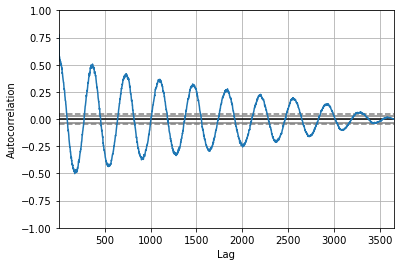

In [24]:
# Autocorrelation plot
# Cycles of strong negative and positive correlation, relationship of an observation with past observations in the same and opposite seasons of the year
autocorrelation_plot(series)
pyplot.show()